In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Step1: Data Sourcing

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step2: Data Cleansing

### Missing Value Treatment

In [7]:
# Null Columns and rows.....
# Rows
df.isnull().all(axis = 1).sum()

0

In [8]:
df.isnull().all(axis = 0).sum()

0

In [9]:
# Null Values in columns with percentage ratio. 
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending = False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

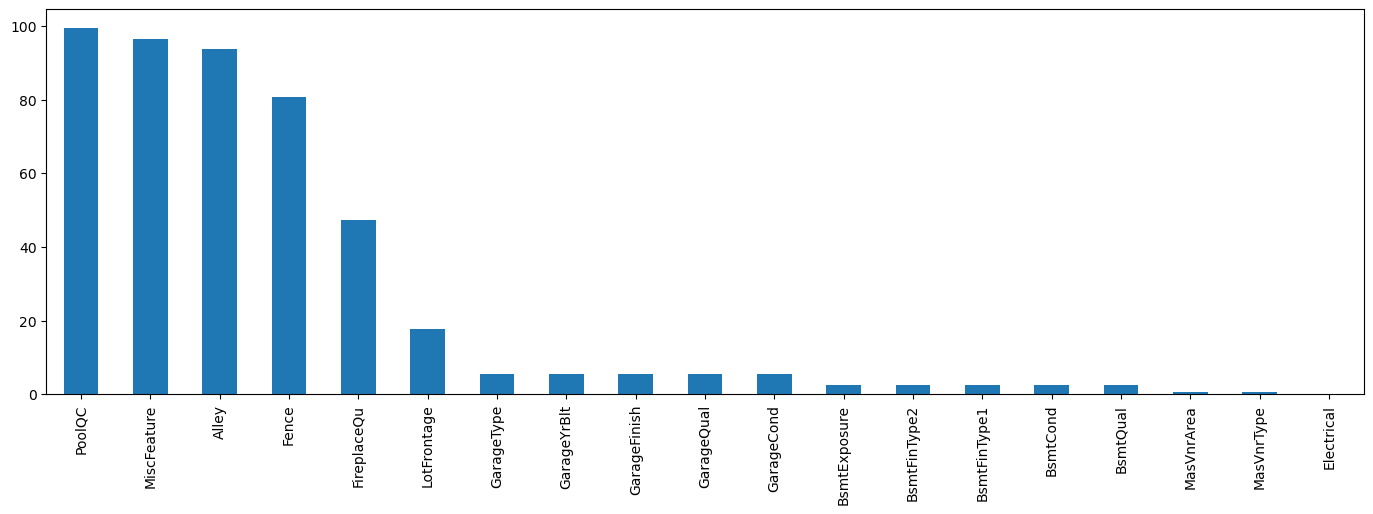

In [10]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

**Observations:**
- There are few columns with missing values more than 30%. Therefore, drop null values by columns.
- `LotFrontage` null values can be imputed with median.
- `Garage` columns has same percentage of missing values. Therefore, drop null values by rows.
- `Basement` columns has same percentage of missing values. Therefore, drop null values by rows.

Now I am deciding my therishold level as 10% null value. So if there is any columns which have null values above the 10%
I am going to remove the feature from the dataframe

In [11]:
# List of columns with missing values >30%
null_val_abv_30 =df.columns[(df.isnull().sum()/len(df)*100>30)]
null_val_abv_30

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
#Drop columns with missing values >30%
df.drop(null_val_abv_30,axis=1, inplace=True)
df.shape

(1460, 76)

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [14]:
# Now let's check null values again
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

**LotFrontage**

In [15]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

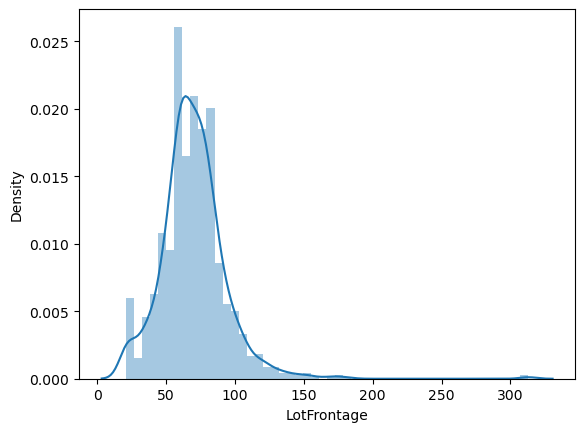

In [16]:
sns.distplot(df['LotFrontage'])
plt.show()

To treat the null values in **LotFrontage** column, we can fill null values by the median of the column.

In [17]:
#Impute LotFrontage missing values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

**Garage Columns**

In [18]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
garage_columns

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [19]:
df[df['GarageYrBlt'].isnull()][garage_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


There are total 81 null values available in the **Garage Columns**. So we can remove these rows cause cause the null values represent that there is no Garage available.

In [20]:
df.dropna(subset=garage_columns, inplace=True)

In [21]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [22]:
# Now check the columns which have null values
df.columns[df.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical'],
      dtype='object')

**MasVnrType** Columns

In [23]:
MasVnrType_columns = ['MasVnrType', 'MasVnrArea']

In [24]:
df[df['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


We can see that there are only 8 values available as null value in **MasVnrArea** and **MasVnrType** so i am going to remove the null values.

In [25]:
df.dropna(subset=MasVnrType_columns, inplace=True)

In [26]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [27]:
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
basement_columns

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [28]:
df[df['BsmtQual'].isnull()][basement_columns].shape[0]

30

Now There we can see that there are 30 null values available for the **basement_columns**. So we are going to drop these values cause the null values represent that there is no basement available.

In [29]:
df.dropna(subset=basement_columns, inplace=True)

In [30]:
# Now check the columns which have null values
df.columns[df.isnull().any()]

Index(['Electrical'], dtype='object')

In [31]:
df['Electrical'].value_counts()

SBrkr    1242
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64

**Electrical** Column
<br>
There is only 1 null value available in **Electrical** column. So we can fill the null values by the mode value of the column. (mode value = SBrkr)

In [32]:
df['Electrical'] = df['Electrical'].fillna(value='SBrkr')

In [33]:
#Final check of missing values 
Total_missing = df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.sort_values(by='Percent_missing_values', ascending = False)

,Total_missing_values,Percent_missing_values
Id,0,0.0
LotConfig,0,0.0
MSZoning,0,0.0
LotFrontage,0,0.0
LotArea,0,0.0
...,...,...
YrSold,0,0.0
SaleType,0,0.0
SaleCondition,0,0.0
GarageCars,0,0.0


# So Now all the Null values are treated successfully.

In [34]:
# Now Lets start the outliers detection in our data. Lets get all the numeric columns.
df.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

In [35]:
numeric_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']

In [36]:
print(numeric_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']


In [37]:
df.drop('Id', axis = 1, inplace = True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [38]:
df.Street.value_counts()

Pave    1334
Grvl       5
Name: Street, dtype: int64

In [39]:
df.Utilities.value_counts()

AllPub    1338
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
df.drop(['Street', 'Utilities'], axis = 1, inplace=True)

#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [41]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [42]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [43]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,3,Lvl,Inside,0,Gilbert,Norm,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,3,Lvl,Inside,0,NWAmes,Norm,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,3,Lvl,Inside,0,Crawfor,Norm,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,3,Lvl,Inside,0,NAmes,Norm,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Drived New Columns with the available data.

There are some Year columns available with the year data. Now these column represent the Age of the property. So we can convert these column into the age of the property. 
<br>
For this we will subtract the values with the max value of the column to get the actual age of the property.
<br>
Now when we going to query for max value then we get 2010 as our max value for all columns.

In [44]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].max()

YearBuilt       2010.0
YearRemodAdd    2010.0
GarageYrBlt     2010.0
YrSold          2010.0
dtype: float64

In [45]:
year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in year_columns:
    df[i+'_Old'] = df[i].max() - df[i]

Now we will delete the extra year columns.

In [46]:
df.drop(year_columns, axis = 1, inplace=True)

### Now After all the analysis our dataframe is ready to move in the next step.

# Data Visualization

#### Let's plot some graphs with respect  to our predictor variable.

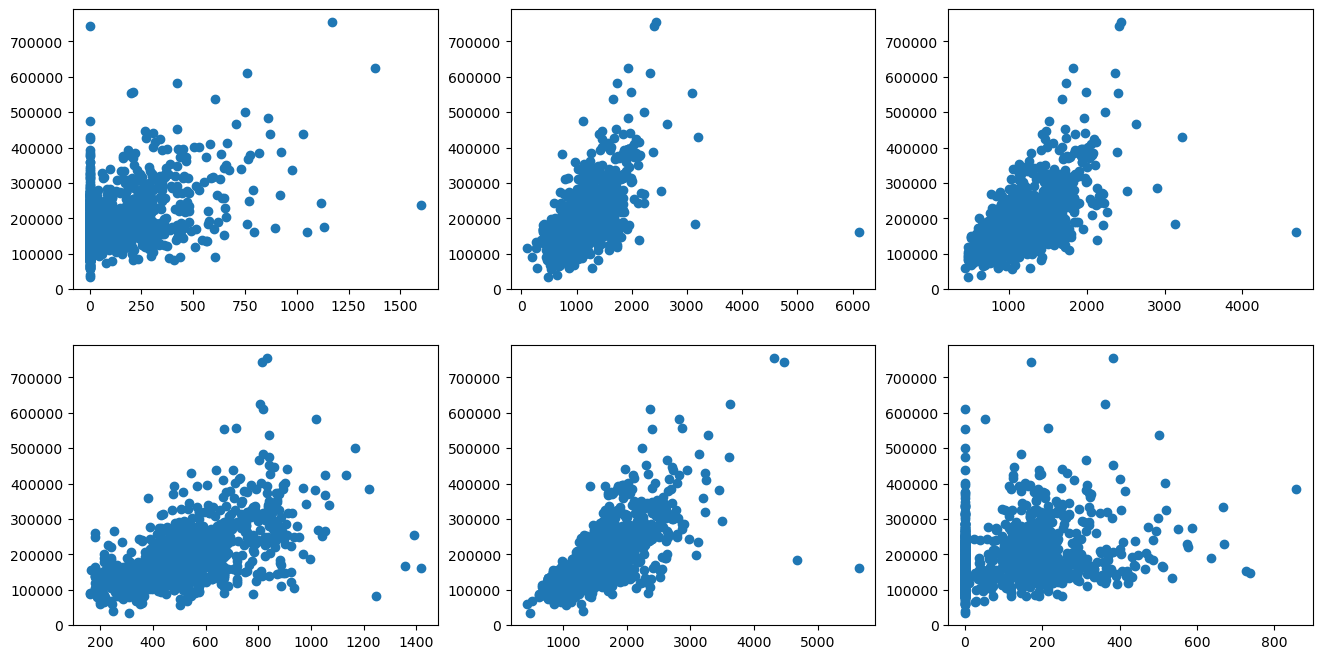

In [47]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)
plt.show()

Let's plot a heap map with numerical columns.

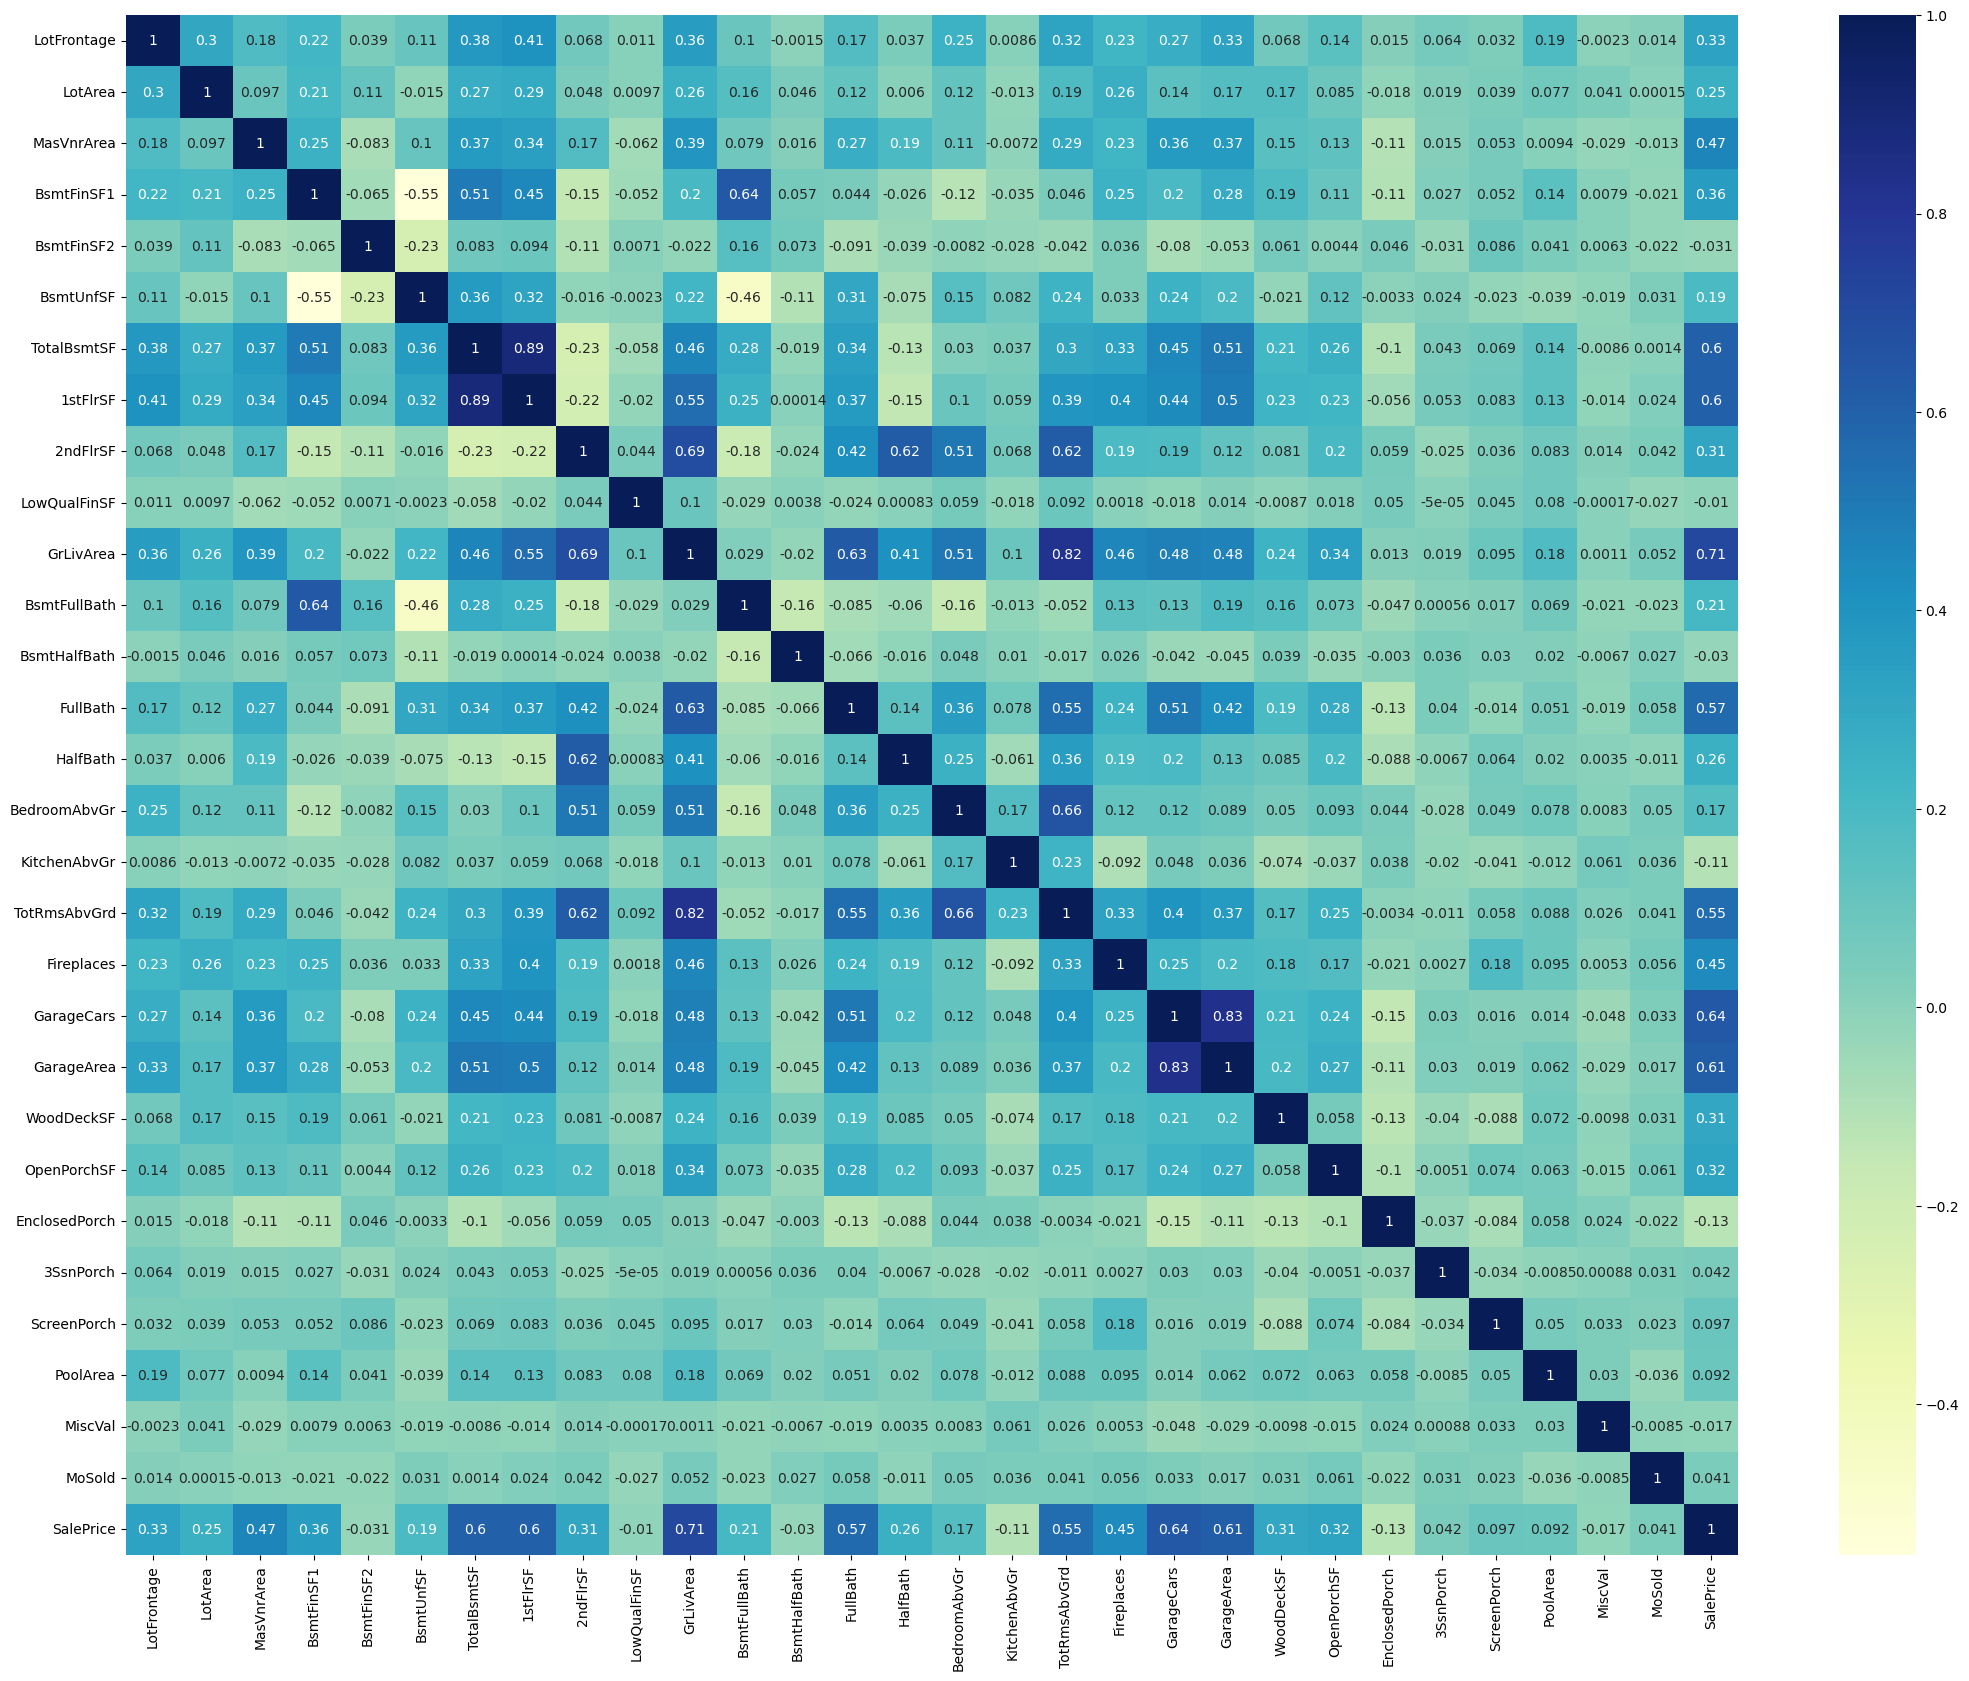

In [48]:
# Let's plot heatmap for all the values
plt.figure(figsize=(26, 20))
sns.heatmap(df[numeric_columns].corr(), cmap = 'YlGnBu', annot=True)
plt.show()

# Outliers Treatment

We don't have need Id column in our data so we are going to delete the Id column.

In [49]:
numeric_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

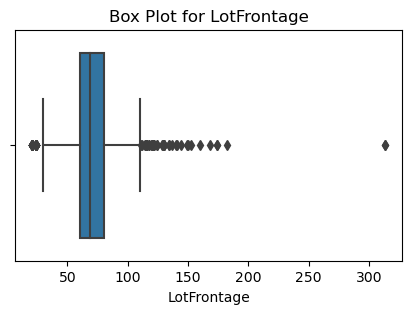

Data differ as per the different quantile values
count    1339.000000
mean       70.440627
std        22.162129
min        21.000000
25%        60.000000
50%        69.000000
75%        80.000000
80%        81.000000
90%        93.000000
95%       105.000000
97%       114.860000
99%       135.860000
max       313.000000
Name: LotFrontage, dtype: float64


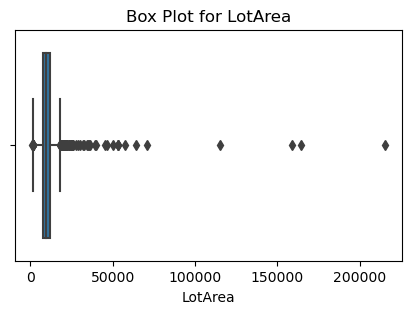

Data differ as per the different quantile values
count      1339.000000
mean      10705.569081
std       10332.791785
min        1300.000000
25%        7746.000000
50%        9600.000000
75%       11757.500000
80%       12346.800000
90%       14574.600000
95%       17506.900000
97%       21742.300000
99%       39717.800000
max      215245.000000
Name: LotArea, dtype: float64


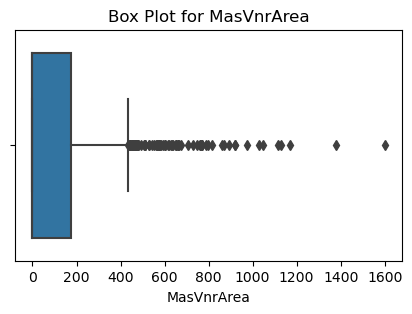

Data differ as per the different quantile values
count    1339.000000
mean      110.277819
std       185.559955
min         0.000000
25%         0.000000
50%         0.000000
75%       174.000000
80%       216.000000
90%       340.000000
95%       464.200000
97%       592.600000
99%       808.400000
max      1600.000000
Name: MasVnrArea, dtype: float64


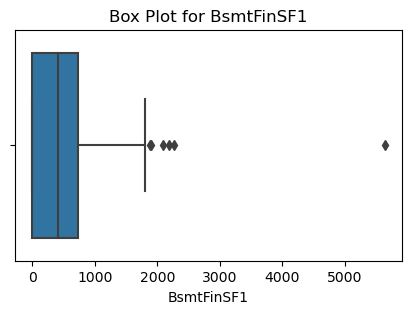

Data differ as per the different quantile values
count    1339.000000
mean      463.887976
std       458.796381
min         0.000000
25%         0.000000
50%       412.000000
75%       733.000000
80%       822.000000
90%      1079.600000
95%      1280.200000
97%      1389.580000
99%      1593.460000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


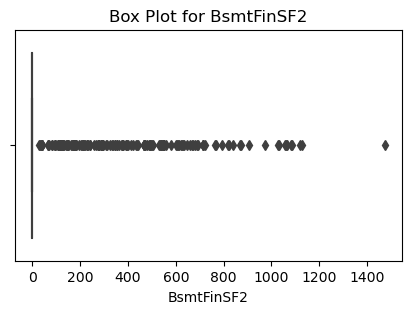

Data differ as per the different quantile values
count    1339.000000
mean       49.181479
std       166.139911
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%       133.400000
95%       411.900000
97%       556.160000
99%       858.360000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


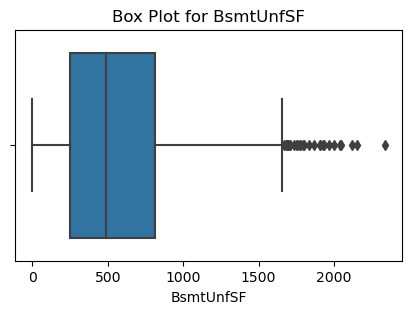

Data differ as per the different quantile values
count    1339.000000
mean      582.346527
std       439.819544
min         0.000000
25%       248.000000
50%       488.000000
75%       815.500000
80%       912.000000
90%      1241.800000
95%      1480.200000
97%      1593.160000
99%      1798.100000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


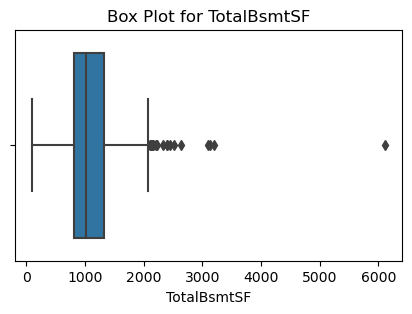

Data differ as per the different quantile values
count    1339.000000
mean     1095.415982
std       405.869459
min       105.000000
25%       818.500000
50%      1021.000000
75%      1324.000000
80%      1408.800000
90%      1616.200000
95%      1754.000000
97%      1906.720000
99%      2156.100000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


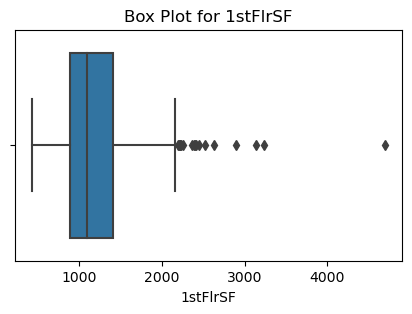

Data differ as per the different quantile values
count    1339.000000
mean     1175.906647
std       386.672669
min       438.000000
25%       894.000000
50%      1098.000000
75%      1414.000000
80%      1494.000000
90%      1686.200000
95%      1838.100000
97%      1986.020000
99%      2220.720000
max      4692.000000
Name: 1stFlrSF, dtype: float64


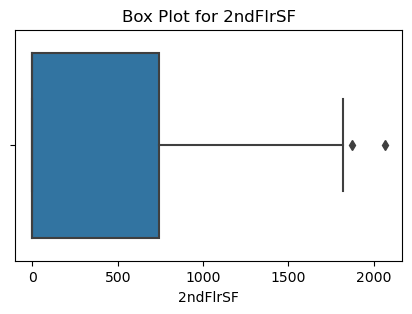

Data differ as per the different quantile values
count    1339.000000
mean      357.352502
std       440.228277
min         0.000000
25%         0.000000
50%         0.000000
75%       740.000000
80%       804.800000
90%       975.400000
95%      1151.100000
97%      1254.000000
99%      1405.640000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


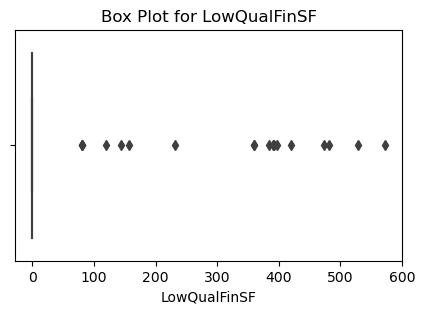

Data differ as per the different quantile values
count    1339.000000
mean        4.218820
std        40.697863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
97%         0.000000
99%       134.880000
max       572.000000
Name: LowQualFinSF, dtype: float64


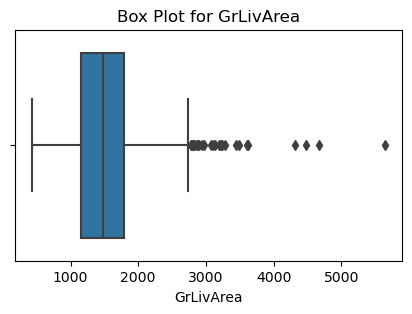

Data differ as per the different quantile values
count    1339.000000
mean     1537.477969
std       520.400181
min       438.000000
25%      1161.000000
50%      1479.000000
75%      1791.000000
80%      1894.400000
90%      2174.200000
95%      2484.200000
97%      2639.160000
99%      3129.360000
max      5642.000000
Name: GrLivArea, dtype: float64


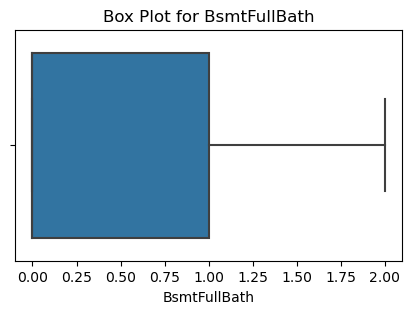

Data differ as per the different quantile values
count    1339.000000
mean        0.438387
std         0.515577
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
97%         1.000000
99%         1.000000
max         2.000000
Name: BsmtFullBath, dtype: float64


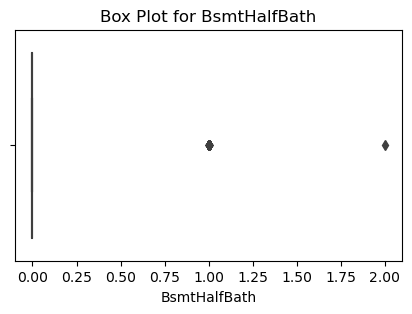

Data differ as per the different quantile values
count    1339.000000
mean        0.060493
std         0.241600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%         0.000000
95%         1.000000
97%         1.000000
99%         1.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


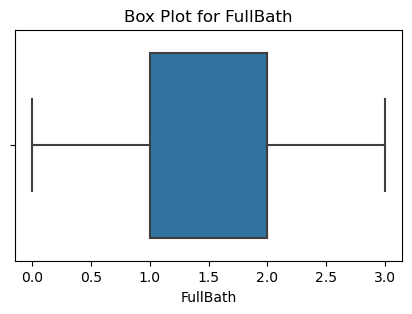

Data differ as per the different quantile values
count    1339.000000
mean        1.575803
std         0.547488
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
80%         2.000000
90%         2.000000
95%         2.000000
97%         2.000000
99%         3.000000
max         3.000000
Name: FullBath, dtype: float64


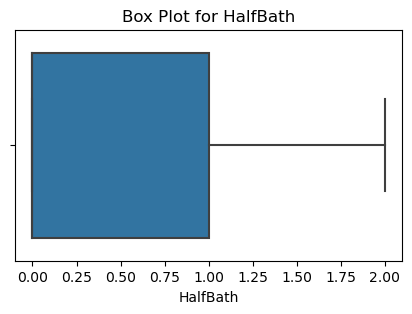

Data differ as per the different quantile values
count    1339.000000
mean        0.403286
std         0.504261
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
97%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


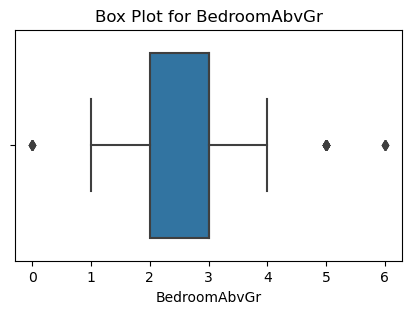

Data differ as per the different quantile values
count    1339.000000
mean        2.864824
std         0.776396
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
80%         3.000000
90%         4.000000
95%         4.000000
97%         4.000000
99%         5.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64


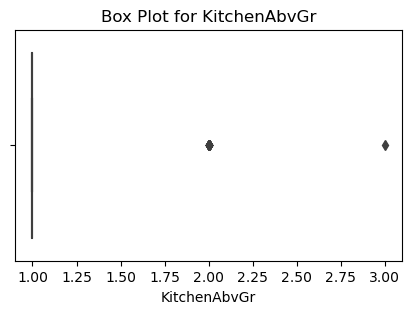

Data differ as per the different quantile values
count    1339.000000
mean        1.029873
std         0.174634
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
97%         1.000000
99%         2.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


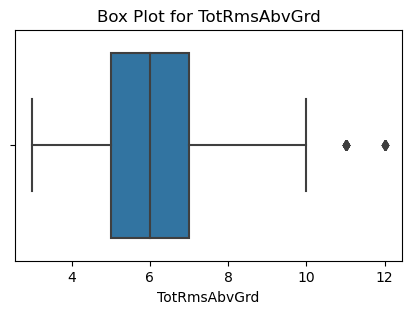

Data differ as per the different quantile values
count    1339.000000
mean        6.550411
std         1.584526
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
97%        10.000000
99%        11.000000
max        12.000000
Name: TotRmsAbvGrd, dtype: float64


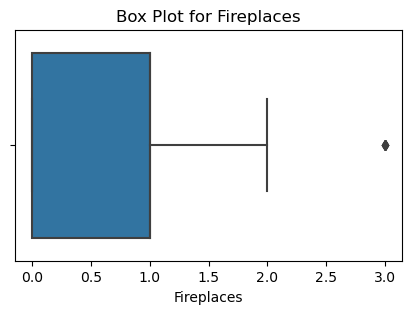

Data differ as per the different quantile values
count    1339.000000
mean        0.648245
std         0.645395
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
80%         1.000000
90%         1.000000
95%         2.000000
97%         2.000000
99%         2.000000
max         3.000000
Name: Fireplaces, dtype: float64


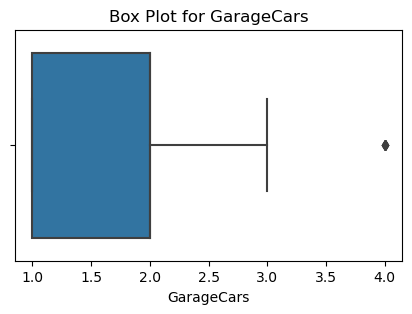

Data differ as per the different quantile values
count    1339.000000
mean        1.871546
std         0.634052
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
80%         2.000000
90%         3.000000
95%         3.000000
97%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64


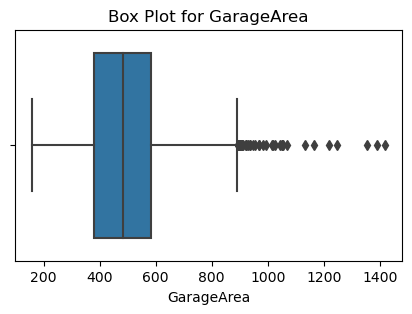

Data differ as per the different quantile values
count    1339.000000
mean      501.374160
std       186.712643
min       160.000000
25%       378.000000
50%       484.000000
75%       583.000000
80%       628.000000
90%       772.400000
95%       857.100000
97%       888.000000
99%      1017.720000
max      1418.000000
Name: GarageArea, dtype: float64


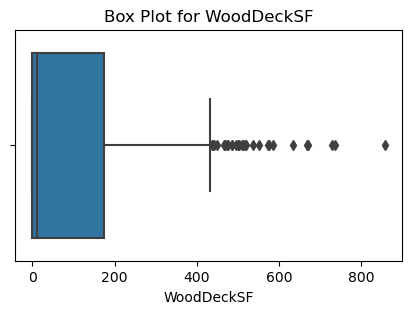

Data differ as per the different quantile values
count    1339.000000
mean       99.385362
std       127.489397
min         0.000000
25%         0.000000
50%        12.000000
75%       174.000000
80%       192.000000
90%       264.200000
95%       342.200000
97%       399.160000
99%       510.240000
max       857.000000
Name: WoodDeckSF, dtype: float64


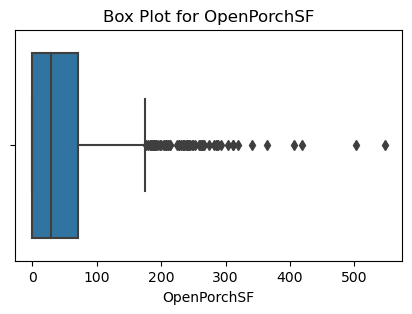

Data differ as per the different quantile values
count    1339.000000
mean       47.746826
std        65.351180
min         0.000000
25%         0.000000
50%        28.000000
75%        70.000000
80%        84.000000
90%       130.000000
95%       172.200000
97%       213.860000
99%       283.860000
max       547.000000
Name: OpenPorchSF, dtype: float64


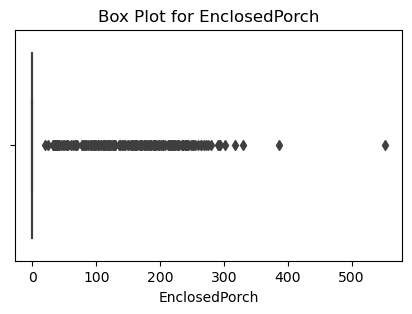

Data differ as per the different quantile values
count    1339.000000
mean       21.247946
std        60.823999
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%       108.800000
95%       180.300000
97%       216.000000
99%       262.100000
max       552.000000
Name: EnclosedPorch, dtype: float64


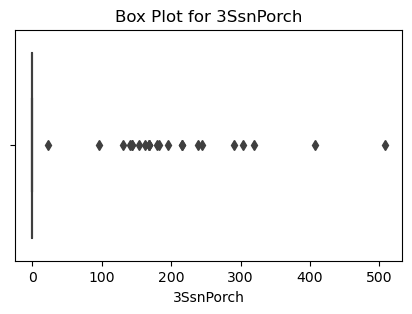

Data differ as per the different quantile values
count    1339.000000
mean        3.583271
std        30.213484
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
97%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


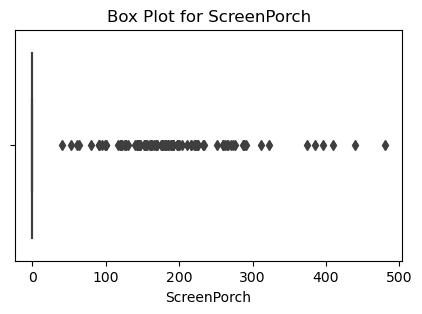

Data differ as per the different quantile values
count    1339.000000
mean       16.421957
std        58.031630
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%         0.000000
95%       168.000000
97%       196.300000
99%       272.240000
max       480.000000
Name: ScreenPorch, dtype: float64


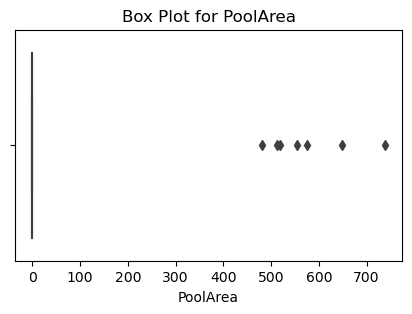

Data differ as per the different quantile values
count    1339.000000
mean        3.008215
std        41.945734
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
97%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


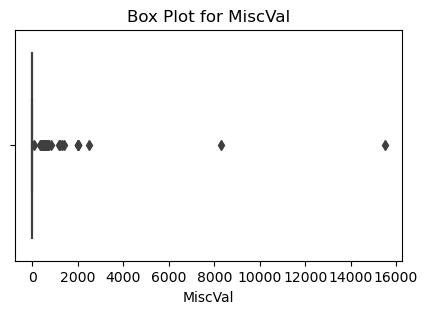

Data differ as per the different quantile values
count     1339.000000
mean        42.900672
std        507.867718
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
97%        400.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


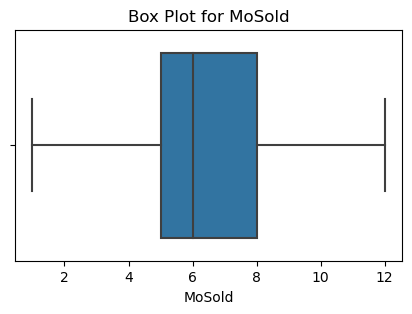

Data differ as per the different quantile values
count    1339.000000
mean        6.330844
std         2.698673
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
80%         8.000000
90%        10.000000
95%        11.000000
97%        12.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


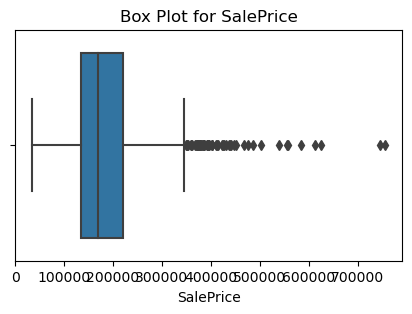

Data differ as per the different quantile values
count      1339.000000
mean     186747.397311
std       78886.108927
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
80%      235000.000000
90%      283570.400000
95%      335000.000000
97%      377489.640000
99%      443881.820000
max      755000.000000
Name: SalePrice, dtype: float64


In [50]:
for i in numeric_columns:
    data = df[i]
    plt.figure(figsize=(5, 3))
    sns.boxplot(data)
    plt.title('Box Plot for ' + str(i))
    plt.show()
    print("Data differ as per the different quantile values")
    print(df[i].describe([0.25,0.50,0.75,0.80,0.90,0.95,0.97,0.99]))

From the above graphs we can see that there is sudden change available in some Feature Values.
<br>
So to resolve this we can remove the outliers.
We are taking lower limit as 25% and upper limit as 99%


In [51]:
columns_ = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']

def drop_outliers(x):
    x_list = []
    for col in columns_:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3 - Q1
        x = x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3 + (1.5*IQR)))]
    return x
df = drop_outliers(df)

In [52]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,...,0,0,12,WD,Normal,250000,10,10,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,3,Lvl,Inside,0,Somerst,Norm,...,0,0,10,WD,Normal,185000,6,5,6.0,1
1455,60,RL,62.0,7917,3,Lvl,Inside,0,Gilbert,Norm,...,0,0,8,WD,Normal,175000,11,10,11.0,3
1456,20,RL,85.0,13175,3,Lvl,Inside,0,NWAmes,Norm,...,0,0,2,WD,Normal,210000,32,22,32.0,0
1458,20,RL,68.0,9717,3,Lvl,Inside,0,NAmes,Norm,...,0,0,4,WD,Normal,142125,60,14,60.0,0


Now there is not outlier data present in our data. So we can moved to our next step.

# Create Dummies Variables

In [53]:
object_columns = [i for i in df.columns if df[i].dtype == 'object']
object_columns

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

We have total 21 Categorical Variable. So before model building we have to convert these categorical variables into numeric values.
<br>
For this we are going to use 

In [54]:
dummie_data = pd.get_dummies(df[object_columns], drop_first=True)

In [55]:
dummie_data

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
house_data = pd.concat([df, dummie_data], axis = 1)

In [57]:
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,3,Lvl,Inside,0,Somerst,Norm,...,0,0,0,0,1,0,0,0,1,0
1455,60,RL,62.0,7917,3,Lvl,Inside,0,Gilbert,Norm,...,0,0,0,0,1,0,0,0,1,0
1456,20,RL,85.0,13175,3,Lvl,Inside,0,NWAmes,Norm,...,0,0,0,0,1,0,0,0,1,0
1458,20,RL,68.0,9717,3,Lvl,Inside,0,NAmes,Norm,...,0,0,0,0,1,0,0,0,1,0


Now when we have created the dummie variables, we can delete these columns.

In [58]:
house_data.drop(object_columns, axis = 1, inplace=True)

#### Let us check the distribution of our target variable before scaling and Splitting

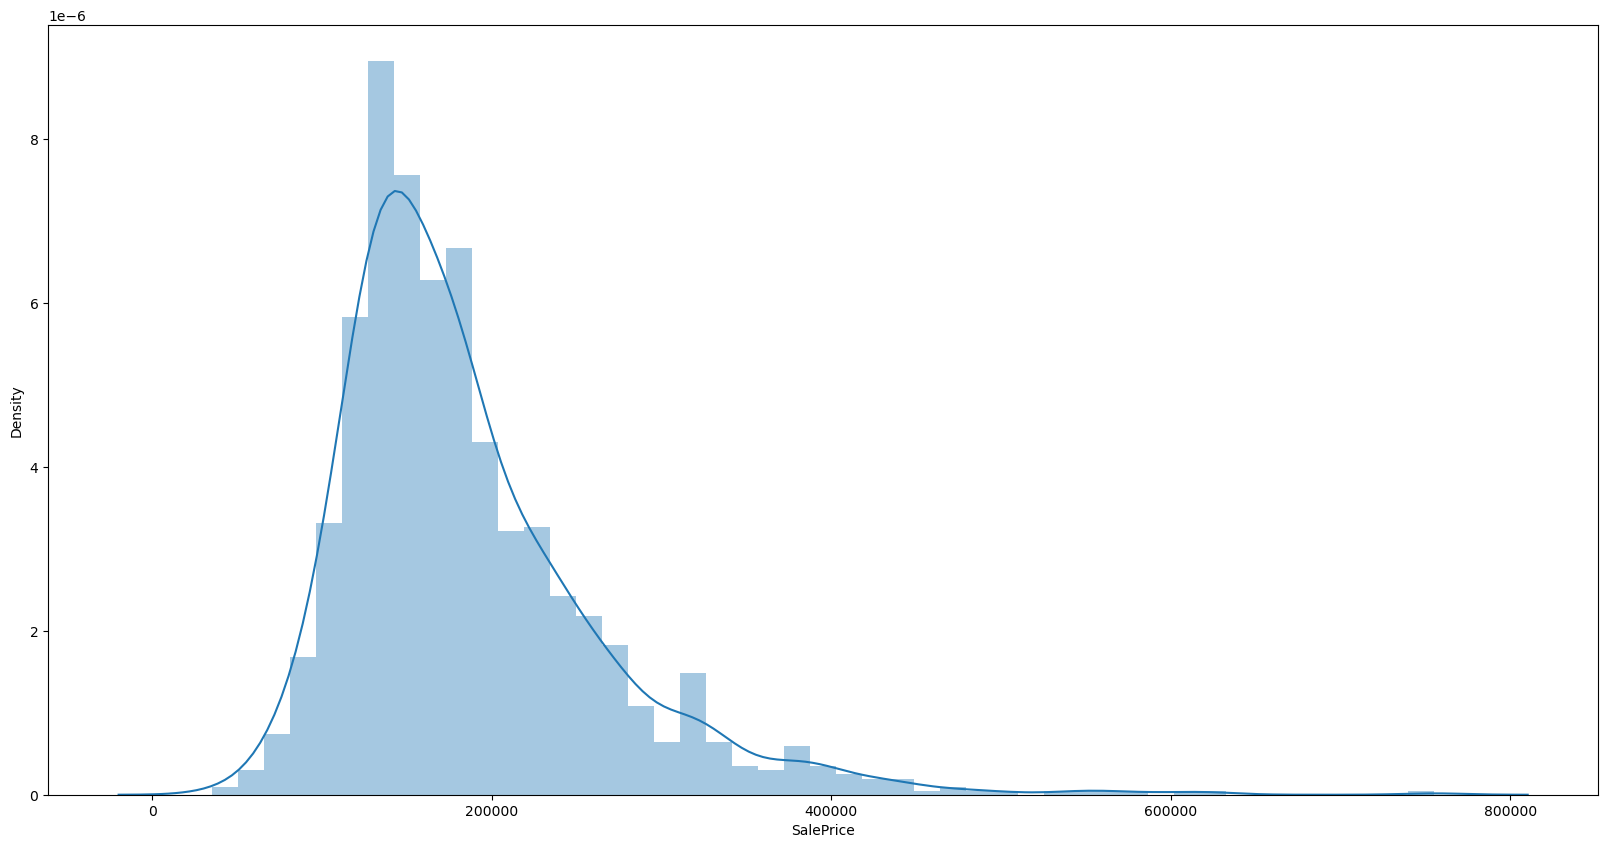

In [59]:
plt.figure(figsize=(20, 10))
sns.distplot(house_data.SalePrice)
plt.show()

# Split model into Train Test Set

In [60]:
from sklearn.model_selection import train_test_split

housePrice_train, housePrice_test = train_test_split(house_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
housePrice_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1350,90,91.0,11643,3,0,5,5,368.0,2,2,...,0,0,0,0,1,0,0,0,1,0
628,60,70.0,11606,0,2,5,5,192.0,2,2,...,0,0,0,0,1,0,0,1,0,0
184,50,92.0,7438,0,0,5,8,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
863,20,70.0,7931,3,0,5,5,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
300,190,90.0,15750,3,0,5,5,56.0,2,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,60,69.0,9636,0,0,6,5,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
56,160,24.0,2645,3,0,8,5,456.0,3,2,...,0,0,0,0,1,0,0,0,0,0
390,50,50.0,8405,3,0,5,8,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
83,20,80.0,8892,0,0,5,5,66.0,2,2,...,0,0,0,0,0,0,0,0,1,0


In [62]:
housePrice_test

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
275,50,55.0,7264,3,0,7,7,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
1107,60,168.0,23257,2,0,7,5,0.0,3,2,...,0,0,1,0,0,0,0,0,0,1
1103,20,79.0,8910,3,0,6,6,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
1392,85,68.0,7838,3,0,5,5,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
466,20,85.0,10628,3,0,7,5,0.0,2,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20,78.0,10140,3,0,6,5,174.0,2,2,...,0,0,0,0,1,0,0,0,1,0
807,70,144.0,21384,3,0,5,6,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
1435,20,80.0,8400,3,0,6,9,237.0,3,3,...,0,0,0,0,0,0,0,0,0,0
747,70,65.0,11700,0,0,7,7,0.0,3,2,...,0,0,0,0,1,0,0,0,1,0


# Scaling dataset

In [63]:
from sklearn.preprocessing import StandardScaler

# get numeric columns from our housePrice_train dataset
num_colm = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']
# num_cols = list(housePrice_train.columns[housePrice_train.dtypes != 'object'])
scaler = StandardScaler()
housePrice_train[num_colm] = scaler.fit_transform(housePrice_train[num_colm])
housePrice_test[num_colm] = scaler.fit_transform(housePrice_test[num_colm])

#### Lets check the distribution again after scaling

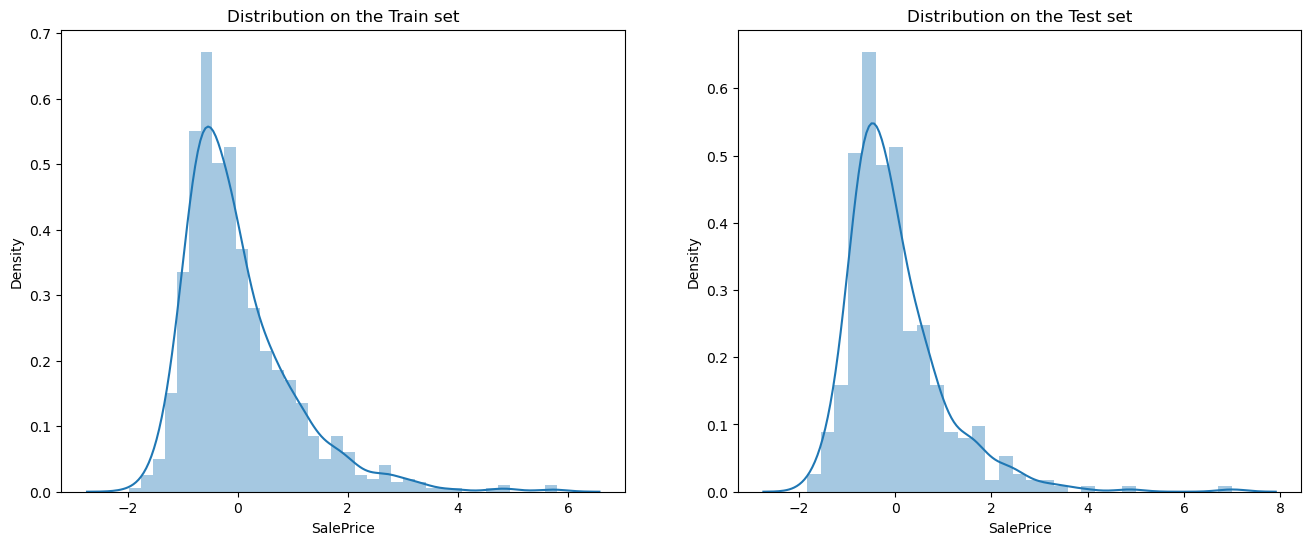

In [64]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(housePrice_train.SalePrice)
plt.title("Distribution on the Train set")
plt.subplot(122)
sns.distplot(housePrice_test.SalePrice)
plt.title("Distribution on the Test set")
plt.show()

# Split Train data into X_train, y_train

In [65]:
y_train = housePrice_train.pop('SalePrice')
X_train = housePrice_train

In [66]:
X_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1350,0.791453,91.0,0.266528,3,0,-0.909257,-0.560409,1.562717,2,2,...,0,0,0,0,1,0,0,0,1,0
628,0.087714,70.0,0.260010,0,2,-0.909257,-0.560409,0.529857,2,2,...,0,0,0,0,1,0,0,1,0,0
184,-0.146866,92.0,-0.474240,0,0,-0.909257,2.218577,-0.596900,2,2,...,0,0,0,0,1,0,0,0,1,0
863,-0.850605,70.0,-0.387391,3,0,-0.909257,-0.560409,-0.596900,2,2,...,0,0,0,0,1,0,0,0,1,0
300,3.137250,90.0,0.990032,3,0,-0.909257,-0.560409,-0.268263,2,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.087714,69.0,-0.087032,0,0,-0.146867,-0.560409,-0.596900,2,2,...,0,0,0,0,1,0,0,0,1,0
56,2.433511,24.0,-1.318592,3,0,1.377912,-0.560409,2.079147,3,2,...,0,0,0,0,1,0,0,0,0,0
390,-0.146866,50.0,-0.303890,3,0,-0.909257,2.218577,-0.596900,2,2,...,0,0,0,0,1,0,0,0,1,0
83,-0.850605,80.0,-0.218098,0,0,-0.909257,-0.560409,-0.209577,2,2,...,0,0,0,0,0,0,0,0,1,0


In [67]:
y_train

1350    0.199494
628    -0.657618
184    -0.763109
863    -0.690584
300    -0.367519
          ...   
882    -0.090606
56     -0.163131
390    -0.868600
83     -0.769702
872    -0.908159
Name: SalePrice, Length: 924, dtype: float64

# Create Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
print(lm.coef_)
print(lm.intercept_)

[-6.44852500e-02  1.21549839e-03  1.32677144e-01  8.71621035e-03
 -1.92609807e-01  1.35803671e-01  8.53998557e-02  7.98335017e-02
  3.94161784e-02 -3.07092020e-02  5.39415864e-02 -3.00227255e-02
  5.85977167e-02 -2.78416291e-03  1.28207046e-01  1.58706737e-02
  1.15767718e-02  2.88203772e-03  1.57724078e-01  2.62755256e-03
  7.37690923e-02  2.49164097e-02  2.08294472e-01  3.04571188e-02
  2.04026064e-01  5.58039296e-03 -1.38885319e-02  2.36934870e-02
 -2.70151206e-03 -8.13498067e-02 -6.78541148e-02  8.42932490e-02
  7.07481794e-02  6.95479817e-03  6.67835232e-04  3.62756790e-02
  1.00715881e-02  1.43505989e-01 -7.17817346e-02  2.12394444e-02
  1.15107242e-02  2.74860584e-04  7.67674005e-03  3.27201863e-02
  2.80331314e-15  1.56609412e-02 -5.90650653e-03 -5.15813407e-03
 -3.78114264e-04  5.89937935e-04  3.30687995e-03  2.31310556e-01
  3.05329950e-01  2.28757754e-01  1.97721568e-01  1.14363999e-01
 -1.47562576e-01 -2.49547165e-02  1.02347202e-01 -6.98402213e-02
  3.77871854e-02  3.12755

In [71]:
y_train_pred = lm.predict(X_train)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9362785170480803

In [73]:
from sklearn.metrics import mean_squared_error
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print("RSS : ",rss)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE : ",mse)
rmse = mse**0.5
print("RMSE : ",rmse)

RSS :  58.87865024757385
MSE :  0.06372148295191975
RMSE :  0.25243114497208885


So our model's r2 score is 93.627 without using the RFE. Now let's use RFE to select optimum features for model building.

# Using RFE Technique for feature elemination

In [74]:
# here we are selecting the top 35 feature for model building.
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=90)

In [75]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=90)

In [76]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [77]:
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,25
1,LotFrontage,False,84
2,LotArea,True,1
3,LotShape,False,71
4,LandSlope,True,1
...,...,...,...
185,SaleCondition_AdjLand,False,101
186,SaleCondition_Alloca,False,31
187,SaleCondition_Family,False,7
188,SaleCondition_Normal,True,1


# Let's filter the train dataset as per the feature selected by RFE and build the model again.

In [78]:
# Let's create a list of RFE selected columns.
rfe_sele_columns = list(rfe_scores[rfe_scores.Status == True].Column_Names)
X_train_rfe = X_train[rfe_sele_columns]

In [79]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true = y_train, y_pred = y_train_pred)

0.9156538522065577

After using RFE our model r2 score is 0.9156538522065577. Our model's r2 score has down. 

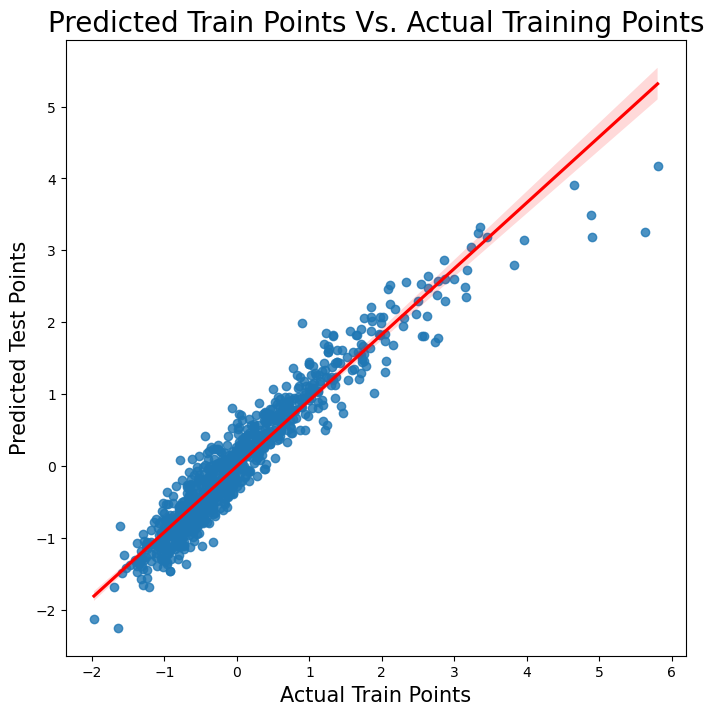

In [80]:
# Let's Visualize our y_train_pred and y_train using regplot graph.
plt.figure(figsize=(8, 8))
corr_plot = sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
plt.title('Predicted Train Points Vs. Actual Training Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Train Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

#  Residual analysis (Proof for Linear Regrssion Assumptions)

After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

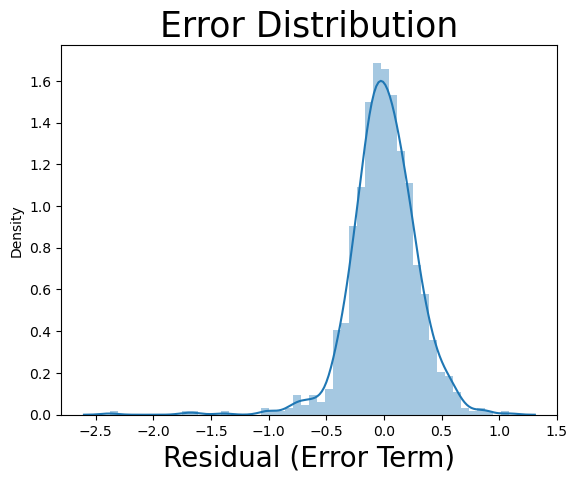

In [81]:
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

### From the above graph it is clear that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

Now Let's check the our model has any multicoliniority present or not

In [82]:
# Let's import statsmodels library
import statsmodels.api as sm
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [83]:
X_train_rfe_const.head()

,const,LotArea,LandSlope,OverallQual,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Functional_Mod,Functional_Typ,GarageType_CarPort,PavedDrive_P,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
1350,1.0,0.266528,0,-0.909257,0.088352,0.431455,1,0.449784,2.196235,-0.101234,...,0,1,0,0,0,0,0,0,1,0
628,1.0,0.260010,2,-0.909257,0.435863,-0.129524,1,-0.360306,1.605841,-0.101234,...,0,1,0,0,0,0,0,0,0,0
184,1.0,-0.474240,0,-0.909257,-1.070019,-1.575123,1,-0.643022,-0.063865,-0.101234,...,0,1,0,0,0,0,0,0,1,0
863,1.0,-0.387391,0,-0.909257,1.589601,0.161754,1,-0.066716,-0.792632,-0.101234,...,0,1,0,0,0,0,0,0,1,0
300,1.0,0.990032,0,-0.909257,0.878361,0.207603,1,0.444347,-0.792632,-0.101234,...,0,1,0,0,0,0,0,0,1,0


In [84]:
# Let's Build  the model.
lm_model = sm.OLS(y_train, X_train_rfe_const).fit()

In [85]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:52:21   Log-Likelihood:                -168.65
No. Observations:                 924   AIC:                             513.3
Df Residuals:                     836   BIC:                             938.2
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8525      0.302     -2.823      0.005      -1.445      -0.260
LotArea                   0.1541      0.015     10.443      0.000       0.125       0.183
LandSlope                -0.1109      0.056     -1.973      0.049      -0.221      -0.001
OverallQual               0.1930      0.020      9.702      0.000       0.154       0.232
BsmtFinSF1                0.1430      0.013     11.397      0.000       0.118       0.168
TotalBsmtSF               0.1998      0.027      7.452      0.000       0.147       0.252
CentralAir                0.0661      0.065      1.021      0.307      -0.061       0.193
1stFlrSF                  0.0018      0.022      0.080      0.936      -0.041       0.045
2ndFlrSF                  0.2705      0.021     13.007      0.000       0.230       0.311
LowQualFinSF              0.0397      0.015      2.585      0.010       0.010       0.070
GrLivArea                 0.2422      0.014     17.929      0.000       0.216       0.269
KitchenAbvGr             -0.0874      0.013     -6.754      0.000      -0.113      -0.062
KitchenQual               0.1534      0.024      6.501      0.000       0.107       0.200
GarageQual                0.1197      0.048      2.512      0.012       0.026       0.213
MSZoning_FV               0.1270      0.166      0.767      0.443      -0.198       0.452
MSZoning_RH               0.1963      0.197      0.999      0.318      -0.189       0.582
MSZoning_RL               0.1737      0.159      1.095      0.274      -0.138       0.485
MSZoning_RM               0.1819      0.151      1.206      0.228      -0.114       0.478
LandContour_HLS           0.1808      0.062      2.934      0.003       0.060       0.302
LandContour_Low          -0.1712      0.099     -1.722      0.085      -0.366       0.024
Neighborhood_Blueste      0.0937      0.225      0.417      0.677      -0.347       0.535
Neighborhood_ClearCr     -0.3219      0.093     -3.475      0.001      -0.504      -0.140
Neighborhood_CollgCr     -0.2577      0.045     -5.713      0.000      -0.346      -0.169
Neighborhood_Edwards     -0.3268      0.059     -5.538      0.000      -0.443      -0.211
Neighborhood_Gilbert     -0.3274      0.058     -5.681      0.000      -0.441      -0.214
Neighborhood_IDOTRR      -0.2388      0.096     -2.485      0.013      -0.427      -0.050
Neighborhood_Mitchel     -0.2559      0.068     -3.772      0.000      -0.389      -0.123
Neighborhood_NAmes       -0.3899      0.045     -8.623      0.000      -0.479      -0.301
Neighborhood_NPkVill      0.1782      0.134      1.331      0.184      -0.085       0.441
Neighborhood_NWAmes      -0.3576      0.058     -6.169      0.000      -0.471      -0.244
Neighborhood_NridgHt      0.2323      0.059      3.912      0.000       0.116       0.349
Neighborhood_OldTown   

In [86]:
# Let's also calculate the VIF.

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 91.5% and the columns has VIF value of infinite which shows multicollinerity.

Though the accuracy the good it has many features and highly collinear.

In [88]:
# Method to calculate P-value from the model.
def getPvalues(model, data):
  p_values_df = pd.DataFrame(columns = ['Features', 'P_value'])
  for feature in data.columns:
    p_val = round(model.pvalues[feature], 5)
    p_values_df = p_values_df.append({'Features':feature, 'P_value':p_val}, ignore_index = True)
  p_values_df = p_values_df.sort_values('P_value', ascending = False)
  return p_values_df

# method to calculate VIF of the model.
def Calculate_vif(data):
  vif = pd.DataFrame()
  vif['Features'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,  i) for i in range(data.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by='VIF', ascending=False)
  return vif

In [89]:
getPvalues(lm_model, X_train_rfe).head(20)

,Features,P_value
6,1stFlrSF,0.93613
19,Neighborhood_Blueste,0.67693
78,Electrical_FuseP,0.55019
53,RoofStyle_Shed,0.52522
13,MSZoning_FV,0.44341
65,Exterior2nd_CBlock,0.42824
57,Exterior1st_CBlock,0.42824
70,MasVnrType_None,0.42685
79,Functional_Maj2,0.42511
60,Exterior1st_ImStucc,0.38927


In [90]:
Calculate_vif(X_train_rfe_const).head(20)

,Features,VIF
55,RoofMatl_Membran,inf
53,RoofStyle_Mansard,inf
50,RoofStyle_Gable,inf
51,RoofStyle_Gambrel,inf
52,RoofStyle_Hip,inf
58,Exterior1st_CBlock,inf
56,RoofMatl_Tar&Grv,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf


### With the P Value summary and VIF data there are some column which have high p value or high VIF values.
<br>
We have some feature which have high P-value(>0.05) and low VIF (<=5) and Some Features have low p value(<=0.05) and High VIF(>5).
Now in that situation we first remove features which fall under the category High P-value - Low VIF.
So we have **1stFlrSF** feature which have highest P-value as 0.818 but Low VIF infinity. So we are going to delete this feature first and then check again P-value and VIF.

In [99]:
def Create_linear_model(X_train):
  # Lets add Constent for X_train.
  X_train_sm = sm.add_constant(X_train)
  # Lets Create our model Now.
  lr = sm.OLS(y_train, X_train_sm)
  # Now Fit the model.
  lr_model = lr.fit()
  return lr_model, X_train_sm


def main(feature_name):
    X_train_rfe.drop(feature_name, axis = 1, inplace=True)
    lr_model , X_train_sm = Create_linear_model(X_train_rfe)
    return lr_model, X_train_sm

In [100]:
lr_model, X_train_sm = main('1stFlrSF')

In [108]:
Calculate_vif(X_train_rfe_const).head(20)

,Features,VIF
55,RoofMatl_Membran,inf
53,RoofStyle_Mansard,inf
50,RoofStyle_Gable,inf
51,RoofStyle_Gambrel,inf
52,RoofStyle_Hip,inf
58,Exterior1st_CBlock,inf
56,RoofMatl_Tar&Grv,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf


In [109]:
getPvalues(lm_model, X_train_rfe).head(20)

,Features,P_value
18,Neighborhood_Blueste,0.67693
77,Electrical_FuseP,0.55019
52,RoofStyle_Shed,0.52522
12,MSZoning_FV,0.44341
64,Exterior2nd_CBlock,0.42824
56,Exterior1st_CBlock,0.42824
69,MasVnrType_None,0.42685
78,Functional_Maj2,0.42511
59,Exterior1st_ImStucc,0.38927
36,Condition1_RRAe,0.36192


In [ ]:
# Now Let's select only features which has selected by RFE.
X_train = X_train[rfe_sele_columns]
housePrice_test = housePrice_test[rfe_sele_columns]

# Data Modeling - Advanced Regression

Regularization aims to achieve an optimally complex model - one that strikes the delicate balance between simplicity and high performance on training data. By applying regularization, we seek to create a model that is both straightforward yet not overly simplistic, ensuring it remains useful and effective.

# Using Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
# Let's Assume the alpha = 0.001 and try to build the model.
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))

### Now let's Perform Cross score validation with using different values of alpha and try to find the optimal paramater

In [ ]:
lm = Lasso()

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train_rfe,y_train)

In [ ]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [ ]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_rfe,y_train)

y_train_pred = lasso.predict(X_train_rfe)

print(r2_score(y_true=y_train,y_pred=y_train_pred))

Now Using lasso regression we have obtained the best optimum value of alpha 0.001 and the r2 score of model is 0.9080577651224244

In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)